In [1]:
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d.art3d import Poly3DCollection, Line3DCollection
import math
%matplotlib widget

In [2]:
def plot_cube(vertices, ax, color = 'r', label = 'cube'):
    # З'єднуємо вершини для створення граней куба
    edges = np.array([
        [vertices[0,:-1], vertices[1,:-1], vertices[2,:-1], vertices[3,:-1]],
        [vertices[4,:-1], vertices[5,:-1], vertices[6,:-1], vertices[7,:-1]],
        [vertices[0,:-1], vertices[1,:-1], vertices[5,:-1], vertices[4,:-1]],
        [vertices[2,:-1], vertices[3,:-1], vertices[7,:-1], vertices[6,:-1]],
        [vertices[1,:-1], vertices[2,:-1], vertices[6,:-1], vertices[5,:-1]],
        [vertices[0,:-1], vertices[3,:-1], vertices[7,:-1], vertices[4,:-1]]
    ])

    # Відображення осей координат
    ax.quiver(-8, 0, 0, 16, 0, 0, color='k', label='_X-axis')
    ax.quiver(0, -8, 0, 0, 16, 0, color='k', label='_Y-axis')
    ax.quiver(0, 0, -8, 0, 0, 16, color='k', label='_Z-axis')

    # Відображення
    poly3d = Poly3DCollection(edges, facecolors='yellow', linewidths=1, edgecolors=color, alpha=0)
    ax.add_collection3d(poly3d)

    # Для відображення в легенді
    ax.add_collection3d(Line3DCollection([], colors=color, linewidths=1, label=label))

    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')

    ax.set_xlim([-8, 8])
    ax.set_ylim([-8, 8])
    ax.set_zlim([-8, 8])

In [3]:
def plot_line(points, ax, label, color):
    ax.plot(points[:, 0], points[:, 1], points[:, 2], label = '_'+label, color = color)

    # Відображення осей координат
    ax.quiver(-8, 0, 0, 16, 0, 0, color='k', label='_X-axis')
    ax.quiver(0, -8, 0, 0, 16, 0, color='k', label='_Y-axis')
    ax.quiver(0, 0, -8, 0, 0, 16, color='k', label='_Z-axis')
        
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    
    # Задаємо діапазон значень та позначки на вісях
    ax.set_xlim([-8, 8])
    ax.set_ylim([-8, 8])
    ax.set_zlim([-8, 8])

In [4]:
def plot_plane(vertices, ax, alpha=0.5, facecolors='blue', edgecolors='r'):
    flat = Poly3DCollection([[arr[:-1] for arr in vertices]], alpha=alpha, facecolors=facecolors, edgecolors=edgecolors)
    ax.add_collection3d(flat)
    
        # Відображення осей координат
    ax.quiver(-8, 0, 0, 16, 0, 0, color='k', label='_X-axis')
    ax.quiver(0, -8, 0, 0, 16, 0, color='k', label='_Y-axis')
    ax.quiver(0, 0, -8, 0, 0, 16, color='k', label='_Z-axis')
        
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    
    # Задаємо діапазон значень та позначки на вісях
    ax.set_xlim([-8, 8])
    ax.set_ylim([-8, 8])
    ax.set_zlim([-8, 8])

In [5]:
# Вершини куба
cube_vertices = np.array([
    [3, 4, 2, 1],
    [5, 4, 2, 1],
    [5, 6, 2, 1],
    [3, 6, 2, 1],
    [3, 4, 4, 1],
    [5, 4, 4, 1],
    [5, 6, 4, 1],
    [3, 6, 4, 1]])

### 2. Задати куб через його вершини. Здійснити масштабування куба (збільшення, зменшення у кілька разів). Записати відповідну матрицю.
### 3. Отриманий результат з попереднього пункту симетрично відобразити відносно початку координат, відносно однієї з координатних площин у тривимірній декартовій системі координат (простір).

In [6]:
center_x = np.mean(cube_vertices[:, 0])
center_y = np.mean(cube_vertices[:, 1])
center_z = np.mean(cube_vertices[:, 2])

In [7]:
# Матриці переміщення
matrix_center = np.array([[1, 0, 0, -center_x], 
                          [0, 1, 0, -center_y], 
                          [0, 0, 1, -center_z],
                          [0, 0, 0, 1]])
matrix_from_center = np.array([[1, 0, 0, center_x],
                               [0, 1, 0, center_y],
                               [0, 0, 1, center_z], 
                               [0, 0, 0, 1]])
matrix_big = np.array([[2, 0, 0, 0],
                       [0, 2, 0, 0], 
                       [0, 0, 2, 0],
                       [0, 0, 0, 1]])
matrix_small = np.array([[0.5, 0, 0, 0],
                         [0, 0.5, 0, 0], 
                         [0, 0, 0.5, 0], 
                         [0, 0, 0, 1]])
matrix_sym_1 = np.array([[-1, 0, 0, 0],
                         [0, -1, 0, 0], 
                         [0, 0, -1, 0],
                         [0, 0, 0, 1]])
matrix_sym_2 = np.array([[1, 0, 0, 0],
                         [0, -1, 0, 0], 
                         [0, 0, 1, 0], 
                         [0, 0, 0, 1]])

In [8]:
# Переміщення в центр
cube_1 = np.dot(cube_vertices, matrix_center.T)

# Збільшення в центрі
cube_2 = np.dot(cube_1, matrix_big.T)

# Зб. обєкт від центра
cube_3 = np.dot(cube_2, matrix_from_center.T)

# Зменшення в центрі
cube_4 = np.dot(cube_1, matrix_small.T)

# Зм.обєкт від центра
cube_5 = np.dot(cube_4, matrix_from_center.T)

# Симетрія відносно центру координат
cube_6 = np.dot(cube_vertices, matrix_sym_1.T)

# Симетрія відносно однієї з координатних площин
cube_7 = np.dot(cube_vertices, matrix_sym_2.T)

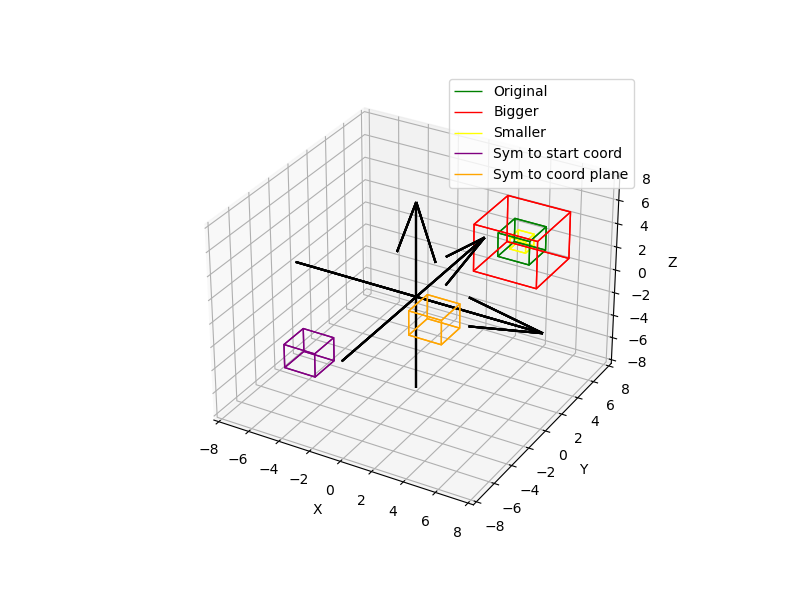

In [9]:
# Виводимо куби
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
plot_cube(cube_vertices, ax, label= 'Original', color='green')
plot_cube(cube_3, ax, label= 'Bigger', color = 'red')
plot_cube(cube_5, ax, label = 'Smaller', color = 'yellow')
plot_cube(cube_6, ax, label = 'Sym to start coord', color='purple')
plot_cube(cube_7, ax, label = 'Sym to coord plane', color='orange')
plt.legend()
plt.show()

### 4. Задати пряму як у прикладі 1 даної лабораторної роботи. Здійснити поворот куба відносно прямої на деякий кут φ. Вказати перетворення, які необхідні для одержання такого результату.

In [67]:
# Точка і вектор
point_on_line = np.array([1, 2, 3])
a, b, c = point_on_line[0], point_on_line[1], point_on_line[2]
direction_vector = np.array([2, 3, 4])

In [68]:
# Нормований вектор 
direction_vector = direction_vector / np.linalg.norm(direction_vector)
direction_vector = np.append(direction_vector, 1)

In [69]:
# Координати вектору і кути
l, m, n = direction_vector[0], direction_vector[1], direction_vector[2]
cos_psi = n/math.sqrt((m**2+n**2))
sin_psi = m/math.sqrt((m**2+n**2))

In [70]:
# Лінія
line_0 = np.array([point_on_line + t * direction_vector[:3] for t in np.linspace(-8, 8, 100)])
line_0 = np.hstack([line_0, np.ones((line_0.shape[0], 1))])

In [71]:
# Moving to center
matrix_1 = np.array([[1, 0, 0, -a],
                    [0, 1, 0, -b],
                    [0, 0, 1, -c],
                    [0, 0, 0, 1]])
# Rotate to XOZ
matrix_2 = np.array([[1, 0, 0, 0,],
                    [0, cos_psi, -sin_psi, 0],
                    [0, sin_psi, cos_psi, 0],
                    [0, 0, 0, 1]])
direction_vector_2 = np.dot(direction_vector, matrix_2.T)
l,d = direction_vector_2[0], direction_vector_2[2]

In [72]:
# Rotate to Z
matrix_3 = np.array([[d, 0, -l, 0,],
                    [0, 1, 0, 0],
                    [l, 0, d, 0],
                    [0, 0, 0, 1]])

In [73]:
# Rotate on given angle
phi = np.pi/2
cos_phi = np.cos(phi)
sin_phi = np.sin(phi)
matrix_4 = np.array([[cos_phi, -sin_phi, 0, 0,],
                    [sin_phi, cos_phi, 0, 0],
                    [0, 0, 1, 0],
                    [0, 0, 0, 1]])

In [74]:
# Rotate from Z
matrix_5 = matrix_3.T
# Rotate from XOZ
matrix_6 = matrix_2.T
# Moving to center
matrix_7 = np.array([[1, 0, 0, a],
                    [0, 1, 0, b],
                    [0, 0, 1, c],
                    [0, 0, 0, 1]])

In [75]:
line_1 = np.dot(line_0, matrix_1.T)
cube_1 = np.dot(cube_vertices, matrix_1.T)

In [76]:
line_2 = np.dot(line_1, matrix_2.T)
cube_2 = np.dot(cube_1, matrix_2.T)

In [77]:
line_3 = np.dot(line_2, matrix_3.T)
cube_3 = np.dot(cube_2, matrix_3.T)

In [78]:
line_4 = np.dot(line_3, matrix_4.T)
cube_4 = np.dot(cube_3, matrix_4.T)

In [79]:
line_5 = np.dot(line_4, matrix_5.T)
cube_5 = np.dot(cube_4, matrix_5.T)

In [80]:
line_6 = np.dot(line_5, matrix_6.T)
cube_6 = np.dot(cube_5, matrix_6.T)

In [81]:
line_7 = np.dot(line_6, matrix_7.T)
cube_7 = np.dot(cube_6, matrix_7.T)

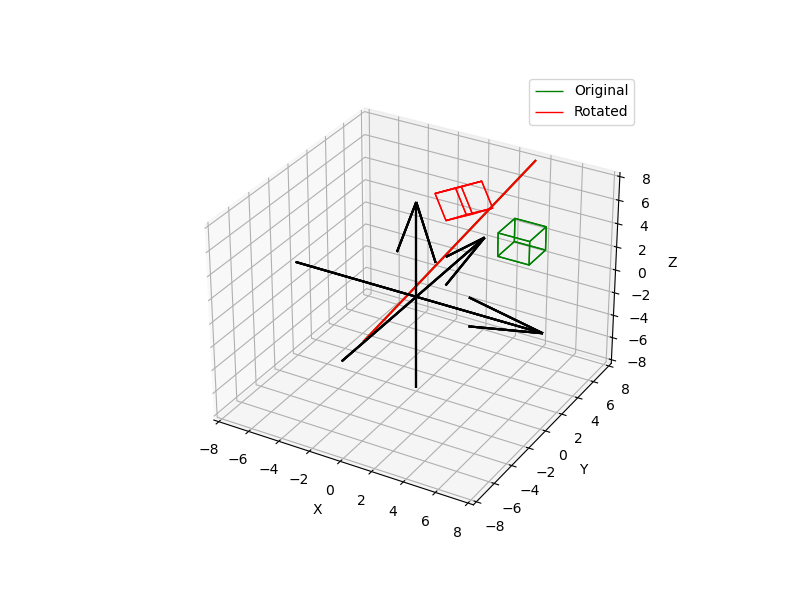

In [82]:
# Виводимо куби
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
plot_cube(cube_vertices, ax, label= 'Original', color='green')
plot_cube(cube_7, ax, label= 'Rotated', color = 'red')
plot_line(line_0, ax, label="orig line", color='green')
plot_line(line_7, ax, label="rot line", color = 'red')
plt.legend()
plt.show()

### 5. Симетрія відносно площини

In [26]:
# Три точки
point1 = np.array([1, 2, 3])
point2 = np.array([4, 3, 5])
point3 = np.array([1, 5, 3])

x1, y1, z1 = point1[0], point1[1], point1[2]
x2, y2, z2 = point2[0], point2[1], point2[2]
x3, y3, z3 = point3[0], point3[1], point3[2]

# Розрахунки
A = np.linalg.det([[y2-y1,z2-z1],
                   [y3-y1,z3-z1]])
B = -np.linalg.det([[x2-x1,z2-z1],
                   [x3-x1,z3-z1]])
C = np.linalg.det([[x2-x1,y2-y1],
                   [x3-x1,y3-y1]])
D = -x1*A-y1*B-z1*C

In [27]:
# Задання кутів площини
vector1 = point2 - point1
vector2 = point3 - point1

corner1 = point1
corner2 = point1 + vector1
corner3 = point1 + vector2
corner4 = point1 + vector1 + vector2

# Кути площини
flat_vertices = [corner1, corner2, corner4, corner3, corner1]
flat_vertices = [np.append(arr, 1) for arr in flat_vertices]

In [28]:
# Normal vector to plane
triple_sqrt = (A**2+B**2+C**2)**0.5
double_sqrt = (A**2+B**2)**0.5
n_vector = np.array([A/triple_sqrt, B/triple_sqrt, C/triple_sqrt])

In [29]:
# Move (plane) to center of coordinates
M1 = np.array([[1,0,0,0],
               [0,1,0,0],
               [0,0,1,D/C],
               [0,0,0,1]])
# Rotate around z 
M2 = np.array([[A/double_sqrt, B/double_sqrt, 0,0],
               [-B/double_sqrt, A/double_sqrt, 0,0],
               [0,0,1,0],
               [0,0,0,1]])
# Rotate to XOY
M3 = np.array([[C/triple_sqrt, 0, -double_sqrt/triple_sqrt,0],
               [0, 1, 0,0],
               [double_sqrt/triple_sqrt,0,C/triple_sqrt,0],
               [0,0,0,1]])
# Symmetry to z
M4 = np.array([[1,0,0,0],
               [0,1,0,0],
               [0,0,-1,0],
               [0,0,0,1]])
# Reverse rotate around z 
M5 = M3.T
# Rotate from XOY
M6 = M2.T
# Move from center of coordinates
M7 = np.array([[1,0,0,0],
               [0,1,0,0],
               [0,0,1,-D/C],
               [0,0,0,1]])

In [30]:
cube_moved_1 = np.dot(cube_vertices, M1.T)
cube_moved_2 = np.dot(cube_moved_1, M2.T)
cube_moved_3 = np.dot(cube_moved_2, M3.T)
cube_moved_4 = np.dot(cube_moved_3, M4.T)
cube_moved_5 = np.dot(cube_moved_4, M5.T)
cube_moved_6 = np.dot(cube_moved_5, M6.T)
cube_moved_7 = np.dot(cube_moved_6, M7.T)

In [31]:
flat_moved_1 = np.dot(flat_vertices, M1.T)
flat_moved_2 = np.dot(flat_moved_1, M2.T)
flat_moved_3 = np.dot(flat_moved_2, M3.T)
flat_moved_4 = np.dot(flat_moved_3, M4.T)
flat_moved_5 = np.dot(flat_moved_4, M5.T)
flat_moved_6 = np.dot(flat_moved_5, M6.T)
flat_moved_7 = np.dot(flat_moved_6, M7.T)

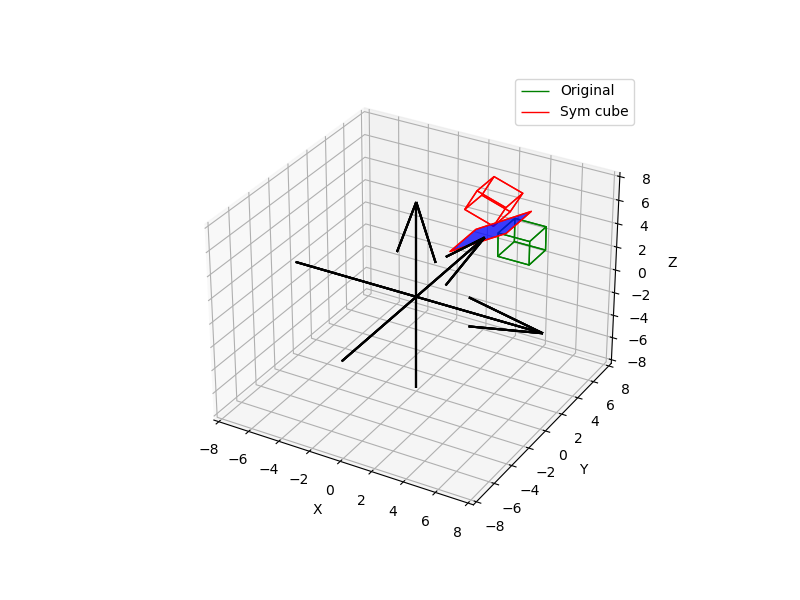

In [32]:
# Виводимо куби
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
plot_cube(cube_vertices, ax, label= 'Original', color='green')
plot_cube(cube_moved_7, ax, label= 'Sym cube', color = 'red')
plot_plane(flat_vertices, ax)
plot_plane(flat_moved_7, ax)
plt.legend()
plt.show()

### 6(7) Симетрія відносно площини (варіант б)

In [33]:
# Переміщення в центр 
M1_2 = np.array([[1,0,0,0],
               [0,1,0,0],
               [0,0,1,D/C],
               [0,0,0,1]])

In [34]:
# Поворот навколо z 
M2_2_z = np.array([[A/double_sqrt, B/double_sqrt, 0,0],
               [-B/double_sqrt, A/double_sqrt, 0,0],
               [0,0,1,0],
               [0,0,0,1]])

In [35]:
# Поворот до ZOY
M3_2_to_ZOY = np.array([[double_sqrt/triple_sqrt, 0, C/triple_sqrt,0],
               [0, 1, 0,0],
               [-C/triple_sqrt,0,double_sqrt/triple_sqrt,0],
               [0,0,0,1]])

In [36]:
# Симетрія до X
M4_2_x = np.array([[-1,0,0,0],
               [0,1,0,0],
               [0,0,1,0],
               [0,0,0,1]])

In [37]:
# Поворот від ZOY
M5_2_from_ZOY = M3_2_to_ZOY.T

In [38]:
# Зворотній поворот навколо z
M6_2 = M2_2_z.T

In [39]:
# Переміщення з центр 
M7_2 = np.array([[1,0,0,0],
               [0,1,0,0],
               [0,0,1,-D/C],
               [0,0,0,1]])

In [40]:
flat_moved_1_2 = np.dot(flat_vertices, M1_2.T)
flat_moved_2_2 = np.dot(flat_moved_1, M2_2_z.T)
flat_moved_3_2 = np.dot(flat_moved_2, M3_2_to_ZOY.T)
flat_moved_4_2 = np.dot(flat_moved_3, M4_2_x.T)
flat_moved_5_2 = np.dot(flat_moved_4, M5_2_from_ZOY.T)
flat_moved_6_2 = np.dot(flat_moved_5, M6_2.T)
flat_moved_7_2 = np.dot(flat_moved_6, M7_2.T)

In [41]:
cube_moved_1_2 = np.dot(cube_vertices, M1_2.T)
cube_moved_2_2 = np.dot(cube_moved_1_2, M2_2_z.T)
cube_moved_3_2 = np.dot(cube_moved_2_2, M3_2_to_ZOY.T)
cube_moved_4_2 = np.dot(cube_moved_3_2, M4_2_x.T)
cube_moved_5_2 = np.dot(cube_moved_4_2, M5_2_from_ZOY.T)
cube_moved_6_2 = np.dot(cube_moved_5_2, M6_2.T)
cube_moved_7_2 = np.dot(cube_moved_6_2, M7_2.T)

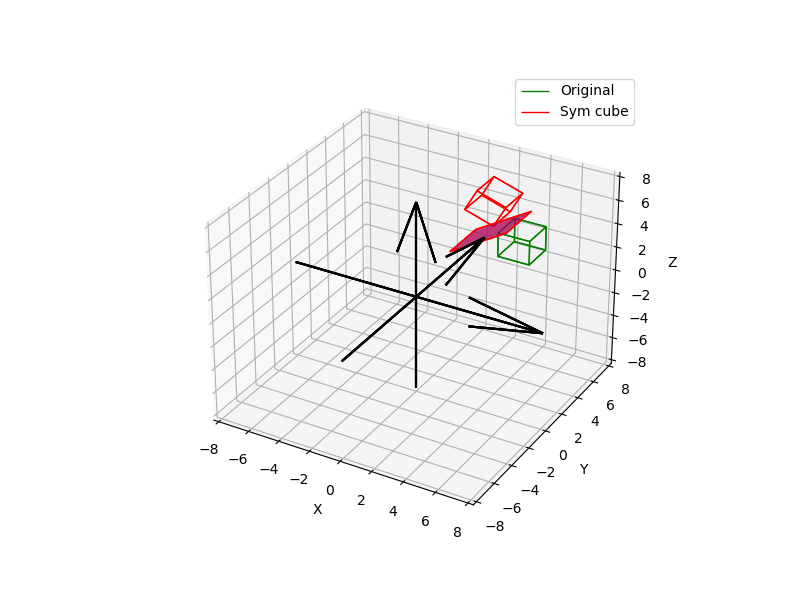

In [42]:
# Виводимо куби
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
plot_plane(flat_vertices, ax, facecolors='blue', edgecolors='r')
plot_plane(flat_moved_7_2, ax, facecolors='red', edgecolors='r')
plot_cube(cube_vertices, ax, label= 'Original', color='green')
plot_cube(cube_moved_7_2, ax, label= 'Sym cube', color = 'red')
plt.legend()
plt.show()

### 6(7) Симетрія відносно площини (варіант в)

In [43]:
# Переміщення в центр
M1_3 = np.array([[1,0,0,D/A],
               [0,1,0,0],
               [0,0,1,0],
               [0,0,0,1]])

In [44]:
# Поворот навколо y 
M2_3_y = np.array([[A/double_sqrt, 0, B/double_sqrt,0],
               [0, 1, 0,0],
               [-B/double_sqrt,0,A/double_sqrt,0],
               [0,0,0,1]])

In [45]:
# Поворот до ZOY
M3_3_to_ZOY = np.array([[double_sqrt/triple_sqrt, 0, -C/triple_sqrt,0],
               [0, 1, 0,0],
               [C/triple_sqrt,0,double_sqrt/triple_sqrt,0],
               [0,0,0,1]])

In [46]:
# Симетрія до X
M4_3_x = np.array([[-1,0,0,0],
               [0,1,0,0],
               [0,0,1,0],
               [0,0,0,1]])

In [47]:
# Поворот від ZOY
M5_3_from_ZOY = M3_3_to_ZOY.T

In [48]:
# Зворотній поворот навколо y
M6_3 = M2_3_y.T

In [49]:
# Переміщення з центру
M7_3 = np.array([[1,0,0,-D/A],
               [0,1,0,0],
               [0,0,1,0],
               [0,0,0,1]])

In [50]:
flat_moved_1_3 = np.dot(flat_vertices, M1_3.T)
flat_moved_2_3 = np.dot(flat_moved_1_3, M2_3_y.T)
flat_moved_3_3 = np.dot(flat_moved_2_3, M3_3_to_ZOY.T)
flat_moved_4_3 = np.dot(flat_moved_3_3, M4_3_x.T)
flat_moved_5_3 = np.dot(flat_moved_4_3, M5_3_from_ZOY.T)
flat_moved_6_3 = np.dot(flat_moved_5_3, M6_3.T)
flat_moved_7_3 = np.dot(flat_moved_6_3, M7_3.T)

In [51]:
cube_moved_1_3 = np.dot(cube_vertices, M1_3.T)
cube_moved_2_3 = np.dot(cube_moved_1_3, M2_3_y.T)
cube_moved_3_3 = np.dot(cube_moved_2_3, M3_3_to_ZOY.T)
cube_moved_4_3 = np.dot(cube_moved_3_3, M4_3_x.T)
cube_moved_5_3 = np.dot(cube_moved_4_3, M5_3_from_ZOY.T)
cube_moved_6_3 = np.dot(cube_moved_5_3, M6_3.T)
cube_moved_7_3 = np.dot(cube_moved_6_3, M7_3.T)

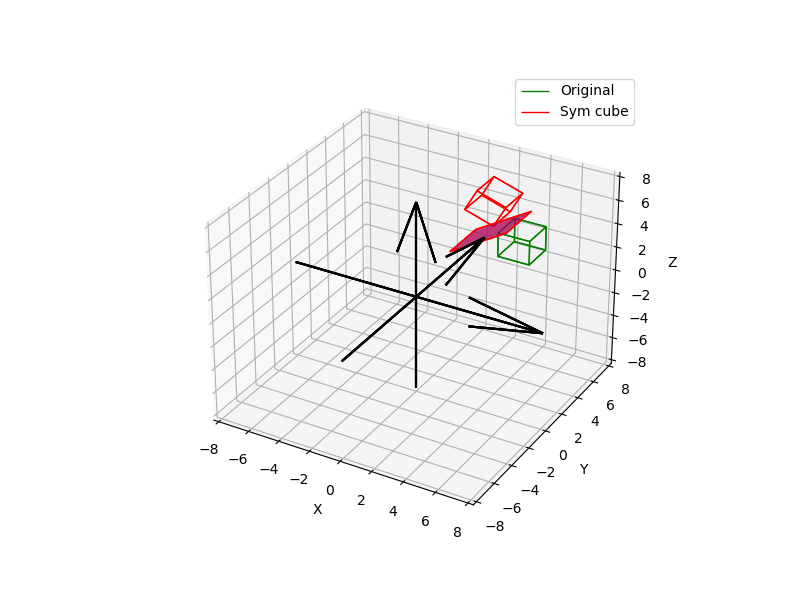

In [52]:
# Виводимо куби
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
plot_plane(flat_vertices, ax, facecolors='blue', edgecolors='r')
plot_plane(flat_moved_7_3, ax, facecolors='red', edgecolors='r')
plot_cube(cube_vertices, ax, label= 'Original', color='green')
plot_cube(cube_moved_7_3, ax, label= 'Sym cube', color = 'red')
plt.legend()
plt.show()

### 8. Симетрія відносно площини на основі знань з аналітичної геометрії

In [53]:
from sympy import symbols, Eq, solve

In [54]:
sym_cube = []
for vertex in cube_vertices:
    t = symbols('t')

    x, y, z = vertex[0], vertex[1], vertex[2]
    
    # пошук t
    equation = Eq(A * (A * t + x) + B * (B * t + y) + C * (C * t + z) + D, 0)
    solution = solve(equation, t)
    
    # знаходження точок що лежать на площині і знаходятся на прямій
    x_o, y_o, z_o = A*solution[0]+x, B*solution[0]+y, C*solution[0]+z

    x_sym, y_sym, z_sym = 2*x_o-x, 2*y_o-y, 2*z_o-z

    point = [x_sym, y_sym, z_sym]
    sym_cube.append(point)

In [55]:
sym_cube = np.array(sym_cube)
sym_cube = np.hstack([sym_cube, np.ones((sym_cube.shape[0], 1))])

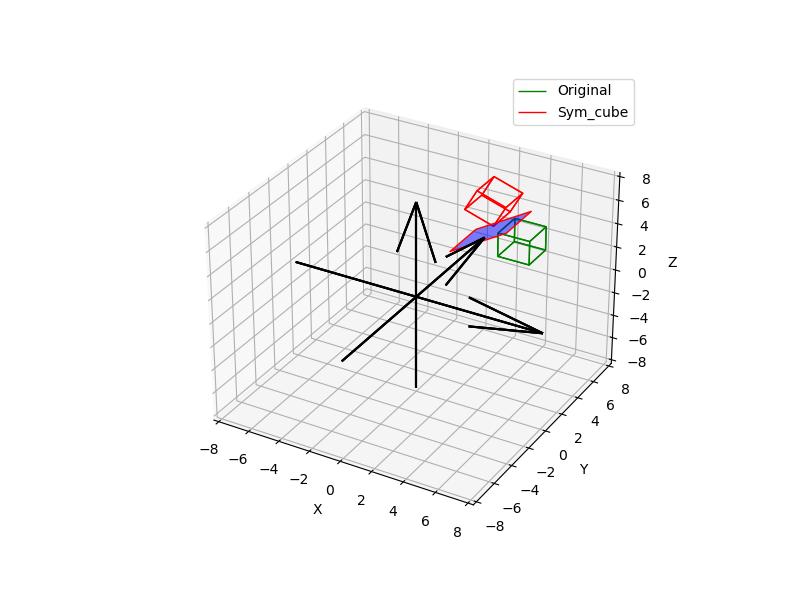

In [56]:
# Виводимо куби
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
plot_cube(cube_vertices, ax, label= 'Original', color='green')
plot_cube(sym_cube, ax, label= 'Sym_cube', color='red')
plot_plane(flat_vertices, ax)
plt.legend()
plt.show()

### 10. Ортогональне проектування кубу на площину загального виду, яка не паралельна жодній з координатних площин

In [57]:
# Нормальний вектор площини
n_vector = np.array([A/triple_sqrt, B/triple_sqrt, C/triple_sqrt])

In [58]:
# Кут між площинами це кут між їхніми нормалями

n = n_vector / np.linalg.norm(n_vector)
    
# Вектор нормалі до z
z_normal = np.array([0, 0, 1])
    
# Косинус кута між площинами
cos_theta = np.dot(n, z_normal) / (np.linalg.norm(n) * np.linalg.norm(z_normal))
    
# Кут в радіанах
angle = np.arccos(cos_theta)
    


In [59]:
# Робимо площину паралельною до Z
M1_10 = np.array([[np.cos(angle),0,np.sin(angle),0],
                  [0, 1, 0, 0],
                  [-np.sin(angle),0,np.cos(angle), 0],
                  [0,0,0,1]])
flat_moved_1_10 = np.dot(flat_vertices, M1_10.T)

In [60]:
# Дистанція до Z
dis = flat_moved_1_10[0][2]

In [61]:
# Z=0
M2_10 = np.array([[1,0,0,0],
                [0, 1, 0, 0],
                [0,0, 1, dis],
                [0,0,0,1]])

In [62]:
# Ортогональна проекція
M3_10 = np.array([[1,0,0,0],
                [0, 1, 0, 0],
                [0,0, 0, 0],
                [0,0,0,1]])

In [63]:
# Переміщення назад
M4_10 = np.array([[1,0,0,0],
                [0, 1, 0, 0],
                [0,0, 1, dis],
                [0,0,0,1]])
M5_10 = M1_10.T

In [64]:
flat_moved_1_10 = np.dot(flat_vertices, M1_10.T)
flat_moved_2_10 = np.dot(flat_moved_1_10, M2_10.T)
flat_moved_3_10 = np.dot(flat_moved_2_10, M3_10.T)
flat_moved_4_10 = np.dot(flat_moved_3_10, M4_10.T)
flat_moved_5_10 = np.dot(flat_moved_4_10, M5_10.T)

In [65]:
cube_moved_1_10 = np.dot(cube_vertices, M1_10.T)
cube_moved_2_10 = np.dot(cube_moved_1_10, M2_10.T)
cube_moved_3_10 = np.dot(cube_moved_2_10, M3_10.T)
cube_moved_4_10 = np.dot(cube_moved_3_10, M4_10.T)
cube_moved_5_10 = np.dot(cube_moved_4_10, M5_10.T)

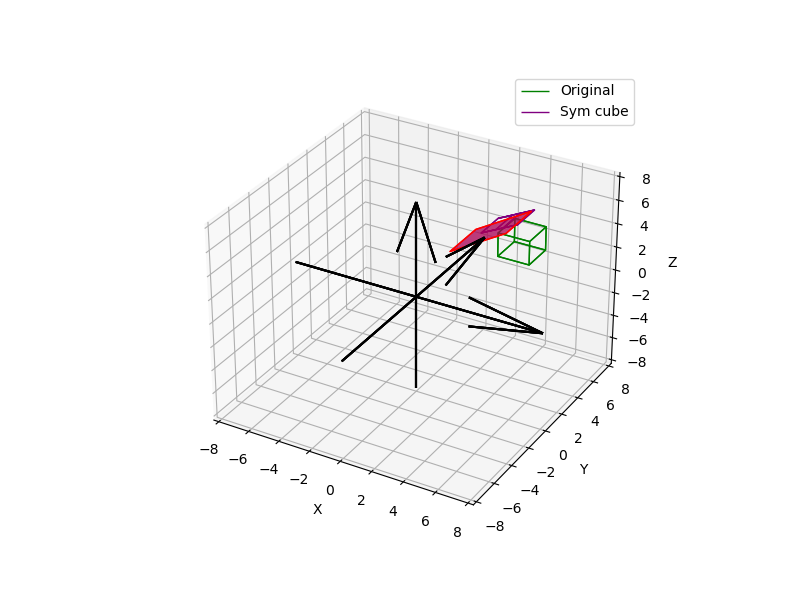

In [66]:
# Виводимо куби
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
plot_plane(flat_vertices, ax, facecolors='blue', edgecolors='r')
plot_plane(flat_moved_5_10, ax, facecolors='red', edgecolors='r')
plot_cube(cube_vertices, ax, label= 'Original', color='green')
plot_cube(cube_moved_5_10, ax, label= 'Sym cube', color = 'purple')
plt.legend()
plt.show()